In [16]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset into pandas dataframe
df = pd.read_csv("./PS_20174392719_1491204439457_log.csv")

In [3]:
# Display the first few rows of the dataframe
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Display data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
df.shape

(6362620, 11)

In [8]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

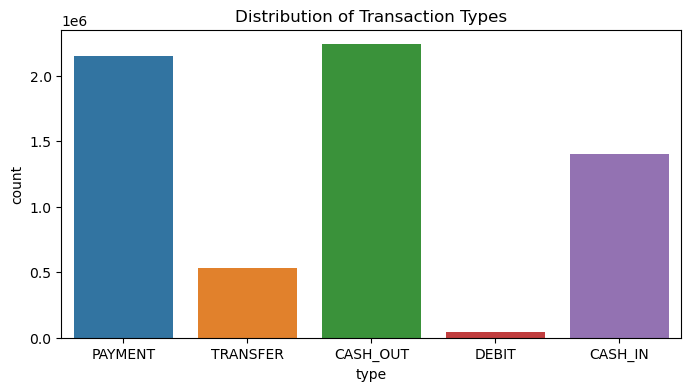

In [11]:
# Count plot for 'type' of transaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.show()

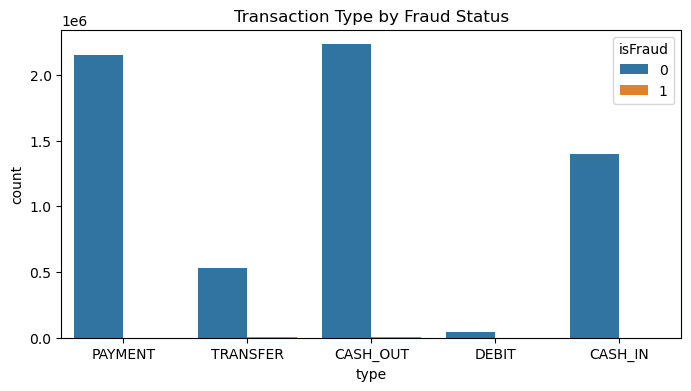

In [12]:
# Bar plot to see the relationship between 'type' and 'isFraud'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type by Fraud Status')
plt.show()

Label Encoding

In [15]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [23]:
# Checking for non-numeric entries
for col in df.columns:
    if df[col].dtype == 'object':
        # Attempt to convert to numeric, set errors='coerce' to handle exceptions
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling or investigating remaining missing values after coercion
print(df.isnull().sum())

step                    0
amount                  0
nameOrig          6362620
oldbalanceOrg           0
newbalanceOrig          0
nameDest          6362620
oldbalanceDest          0
newbalanceDest          0
isFraud                 0
isFlaggedFraud          0
type_0                  0
type_1                  0
type_2                  0
type_3                  0
type_4                  0
dtype: int64


In [19]:
# Convert Categorical Data to Numeric using Label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [20]:
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [21]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0,type_1,type_2,type_3,type_4
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [24]:
df.corr()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0,type_1,type_2,type_3,type_4
step,1.000000,0.022373,NaN,-0.010058,-0.010299,NaN,0.027665,0.025888,0.031578,0.003277,0.004077,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,NaN,-0.002762,-0.007861,NaN,0.294137,0.459304,0.076688,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
nameOrig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,-0.010058,-0.002762,NaN,1.000000,0.998803,NaN,0.066243,0.042029,0.010154,0.003835,0.506761,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,NaN,0.998803,1.000000,NaN,0.067812,0.041837,-0.008148,0.003776,0.527373,-0.210977,-0.021872,-0.193915,-0.087355
nameDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,0.027665,0.294137,NaN,0.066243,0.067812,NaN,1.000000,0.976569,-0.005885,-0.000513,0.076105,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,NaN,0.042029,0.041837,NaN,0.976569,1.000000,0.000535,-0.000529,0.034988,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.076688,NaN,0.010154,-0.008148,NaN,-0.005885,0.000535,1.000000,0.044109,-0.019089,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.012295,NaN,0.003835,0.003776,NaN,-0.000513,-0.000529,0.044109,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245


In [25]:
correlation_matrix = df.corr()

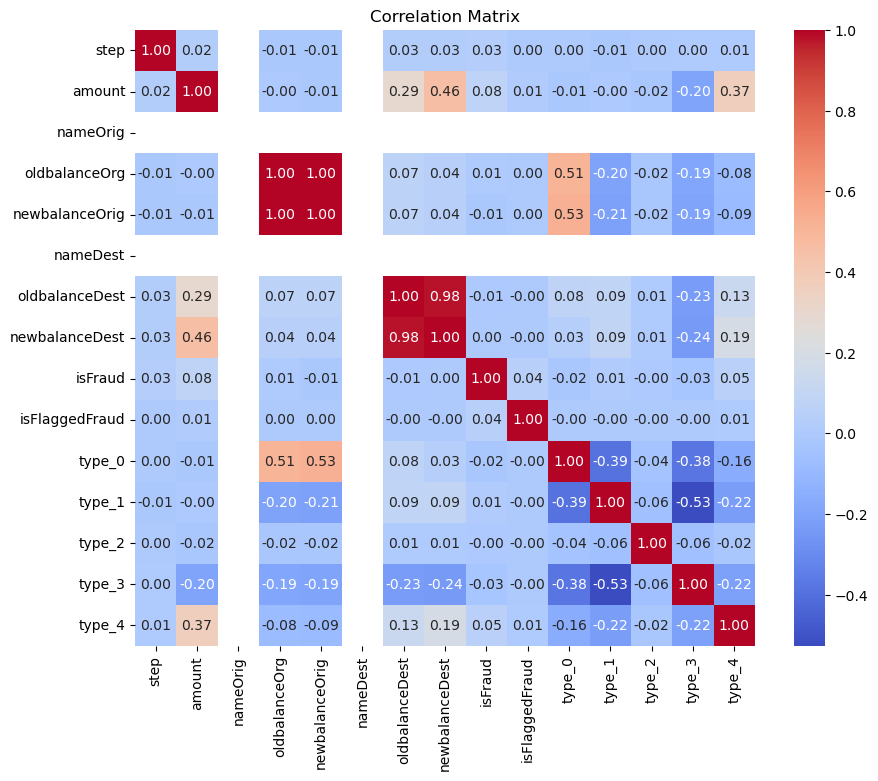

In [26]:
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Outliers

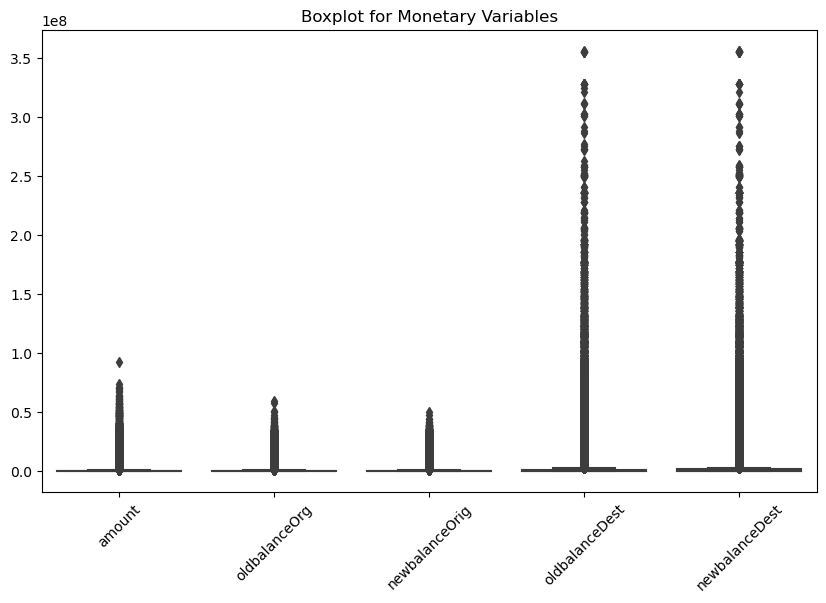

In [27]:
# Visualizing outliers with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot for Monetary Variables')
plt.xticks(rotation=45)
plt.show()

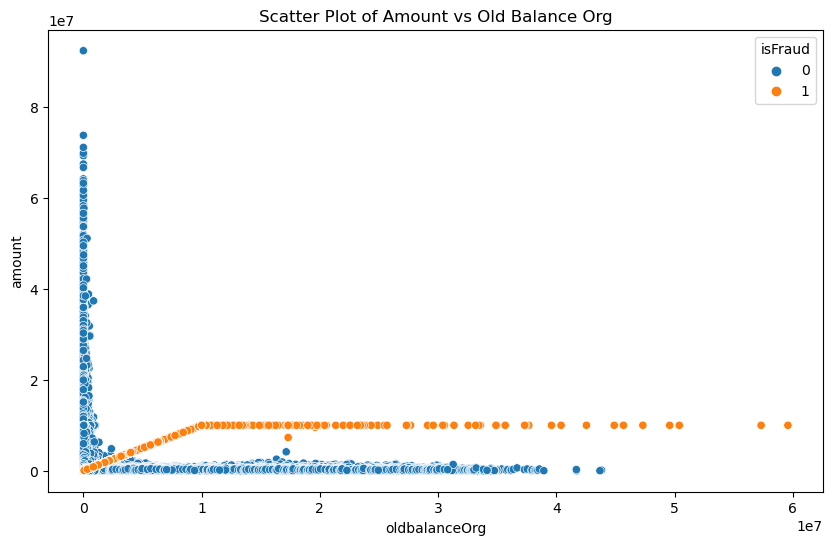

In [33]:
# Scatter plot for examining relationships and outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df)
plt.title('Scatter Plot of Amount vs Old Balance Org')
plt.show()